Learning objectives:
After doing this exercise, you'll know how to do the following:

Run Colabs.
Tune the following hyperparameters:
learning rate
number of epochs
batch size
Interpret different kinds of loss curves.

In [120]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [121]:
'''Define functions that build and train a model
The following code defines two functions:

build_model(my_learning_rate), which builds an empty model.
train_model(model, feature, label, epochs), which trains the model from the examples (feature and label) you pass.
Since you don't need to understand model building code right now, we've hidden this code cell. You may optionally double-click the headline to explore this code.'''

#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model          


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [122]:
'''Define plotting functions
We're using a popular Python library called Matplotlib to create the following two plots:

a plot of the feature values vs. the label values, and a line showing the output of the trained model.
a loss curve.
We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.'''

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [123]:
'''Define the dataset
The dataset consists of 12 examples. Each example consists of one feature and one label.'''

my_feature=np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label=np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Specify the hyperparameters
The hyperparameters in this Colab are as follows:

learning rate
epochs
batch_size
The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Task 1: Examine the graphs
Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots. Does it? Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train. That said, unless you are an extremely lucky person, the red line probably doesn't align nicely with the blue dots.

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.



Epoch 1/10


C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - loss: 242.7328 - root_mean_squared_error: 15.5799
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 234.6806 - root_mean_squared_error: 15.3193
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 228.9703 - root_mean_squared_error: 15.1318
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 224.2663 - root_mean_squared_error: 14.9755
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 220.1469 - root_mean_squared_error: 14.8373
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 216.4170 - root_mean_squared_error: 14.7111
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 212.9681 - root_mean_squared_error: 14.5934
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 209.7329 - root_mean_squared_error: 14.4822
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 206.6663 - root_mean_squared_error: 14.3759
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 203.7366 - root_mean_squared_error: 14.2736

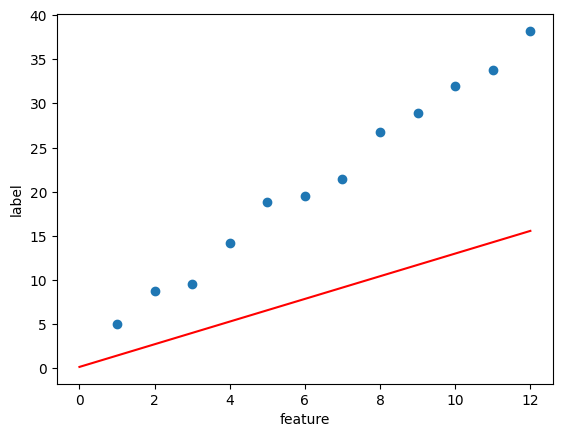

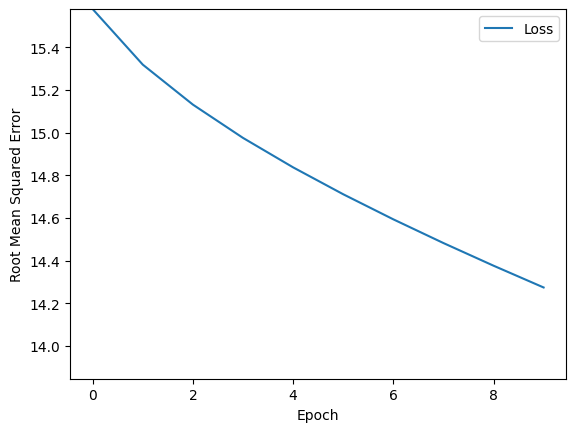

In [124]:
learning_rate=0.01
epochs=10
my_batch_size=12
my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Task 2: Increase the number of epochs
Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should stay steady (zero slope or nearly zero slope), which indicates that training has converged.

In Task 1, the training loss did not converge. One possible solution is to train for more epochs. Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - loss: 409.0571 - root_mean_squared_error: 20.2252
Epoch 2/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 398.5757 - root_mean_squared_error: 19.9644
Epoch 3/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 391.1033 - root_mean_squared_error: 19.7763
Epoch 4/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 384.9242 - root_mean_squared_error: 19.6195
Epoch 5/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 379.4955 - root_mean_squared_error: 19.4806
Epoch 6/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 374.5662 - root_mean_squared_error: 19.3537
Epoch 7/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 369.9963 - root_mean_squared_error: 19.2353
Epoch 8/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 365.6989 - root_mean_squared_error: 19.1233
Epoch 9/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 361.6159 - root_mean_squared_error: 19.0162
Epoch 10/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 357.7066 - root_mean_s

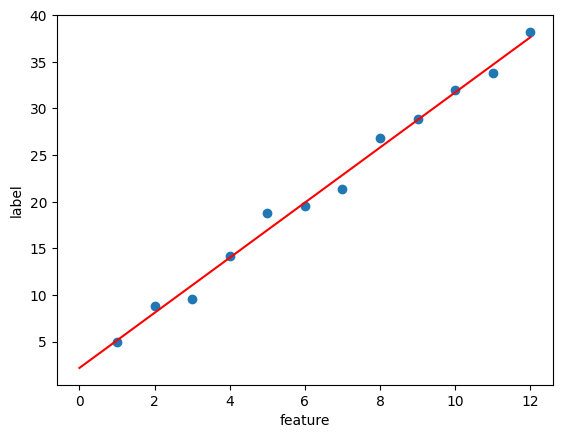

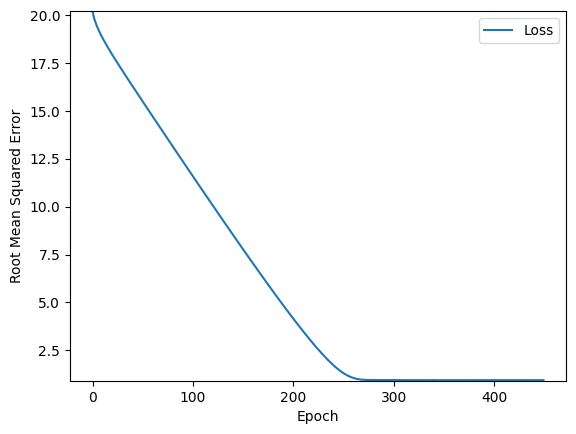

In [125]:
learning_rate=0.01
epochs=450
my_batch_size=12
my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Task 3: Increase the learning rate
In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - loss: 150.6753 - root_mean_squared_error: 12.2750
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6752929.5000 - root_mean_squared_error: 2598.6399
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 150.0437 - root_mean_squared_error: 12.2492
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.4963 - root_mean_squared_error: 1.2232
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9780 - root_mean_squared_error: 0.9889
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9654 - root_mean_squared_error: 0.9825
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9594 - root_mean_squared_error: 0.9795
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9537 - root_mean_squared_error: 0.9766
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9482 - root_mean_squared_error: 0.9737
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.9427 - root_mean_squared_error: 0.9709


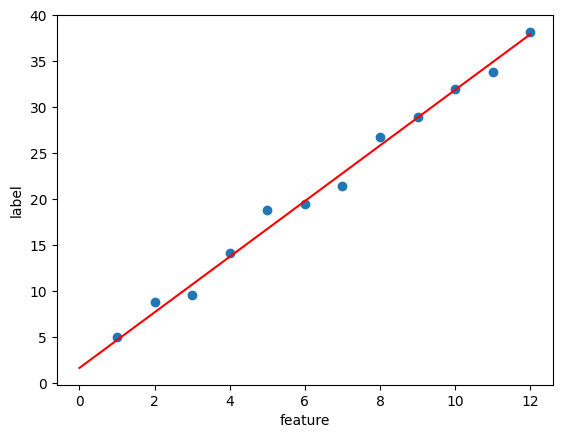

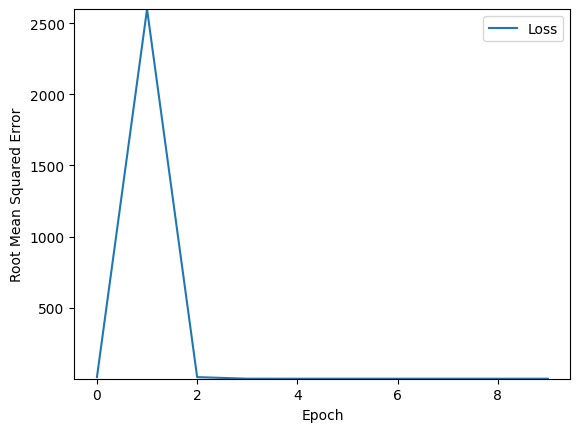

In [126]:
learning_rate=100.0
epochs=10
my_batch_size=12
my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Task 5: Adjust the batch size
The system recalculates the model's loss value and adjusts the model's weights and bias after each iteration. Each iteration is the span in which the system processes one batch. For example, if the batch size is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.

One epoch spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with batch_size in the following code cell. What's the smallest integer you can set for batch_size and still have the model converge in a hundred epochs?

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 304.8712 - root_mean_squared_error: 17.0454
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 132.2642 - root_mean_squared_error: 11.4226 
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 119.6613 - root_mean_squared_error: 10.7984 
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50.4677 - root_mean_squared_error: 7.0157   
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.9862 - root_mean_squared_error: 3.5903
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5429 - root_mean_squared_error: 2.3174  
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5337 - root_mean_squared_error: 1.5547 
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4795 - root_mean_squared_error: 1.2103 
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8427 - root_mean_squared_error: 0.9085 
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3769 - root_mean_squared_er

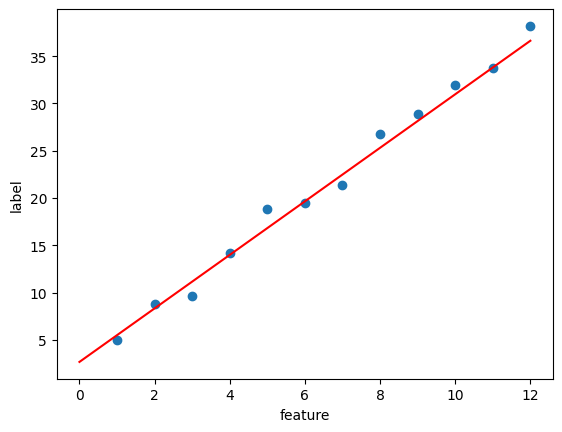

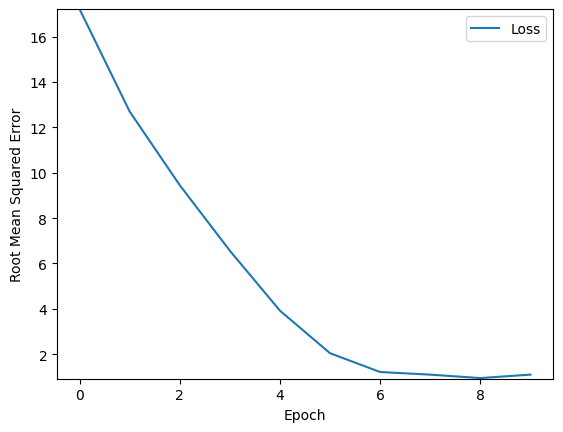

In [127]:
learning_rate=0.05
epochs=10
my_batch_size=1
my_model=build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.